In [73]:
import numpy as np
import json
import pandas as pd
from statsbombpy import sb
from mplsoccer.pitch import Pitch
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# print(sb.matches(competition_id=16, season_id = 4))

In [2]:
match = sb.events(match_id=22912, split=True)

credentials were not supplied. open data access only


In [18]:
shots = match['shots']

In [4]:
# pd.set_option("display.max_columns", None)
# shots.head(5)

In [5]:
shots[['location_x', 'location_y']] = shots['location'].apply(pd.Series)
shots[['end_x', 'end_y', 'end_z']] = shots['shot_end_location'].apply(pd.Series)

In [6]:
shot_xyz = shots.filter(['team', 'shot_statsbomb_xg', 'location_x', 'location_y', 'end_x', 'end_y'], axis=1)

In [8]:
# shot_xyz

In [9]:
liv_shots = shot_xyz.loc[shots['team'] == 'Liverpool']
tot_shots = shot_xyz.loc[shots['team'] == 'Tottenham Hotspur']

In [10]:
liv_shots['location_x'] = 120 - liv_shots['location_x']
liv_shots['location_y'] = 80 - liv_shots['location_y']
liv_shots['end_x'] = 120 - liv_shots['end_x']
liv_shots['end_y'] = 80 - liv_shots['end_y']

C:\Users\gcrem\AppData\Local\Temp/ipykernel_16000/3808655931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_shots['location_x'] = 120 - liv_shots['location_x']
C:\Users\gcrem\AppData\Local\Temp/ipykernel_16000/3808655931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_shots['location_y'] = 80 - liv_shots['location_y']
C:\Users\gcrem\AppData\Local\Temp/ipykernel_16000/3808655931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

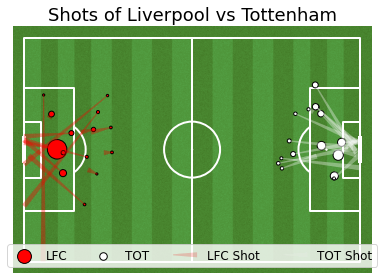

In [13]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

liv = pitch.scatter(liv_shots.location_x, liv_shots.location_y, s=liv_shots.shot_statsbomb_xg*500, ax=ax, color="red", edgecolors="k", label="LFC")
tot = pitch.scatter(tot_shots.location_x, tot_shots.location_y, s=tot_shots.shot_statsbomb_xg*500, ax=ax, color="white", edgecolors="k", label="TOT")

liv2 = pitch.lines(liv_shots.location_x, liv_shots.location_y, liv_shots.end_x, liv_shots.end_y, ax=ax, alpha=0.2, color="red", comet=True, label="LFC Shot")
tot2 = pitch.lines(tot_shots.location_x, tot_shots.location_y, tot_shots.end_x, tot_shots.end_y, ax=ax, alpha=0.2, color="white", comet=True, label="TOT Shot")

legend = ax.legend(loc='lower center', labelspacing=1, fontsize=12, ncol=4)
title = ax.set_title('Shots of Liverpool vs Tottenham', fontsize = 18)

In [24]:
passes = match['passes']

In [28]:
pd.set_option("display.max_columns", None)
passes.head(5)

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,team,player,position,location,duration,related_events,match_id,pass_recipient,pass_length,pass_angle,pass_height,pass_end_location,pass_body_part,pass_type,possession_team_id,player_id,pass_switch,pass_outcome,under_pressure,pass_aerial_won,pass_through_ball,pass_technique,off_camera,pass_inswinging,pass_straight,pass_cross,pass_assisted_shot_id,pass_shot_assist,pass_outswinging,pass_cut_back,pass_deflected,out,pass_goal_assist
0,68f1458f-6ddb-4626-82cb-6f96eaca8087,5,1,00:00:00.208,0,0,Pass,2,Liverpool,From Kick Off,Liverpool,Jordan Brian Henderson,Right Center Midfield,"[61.0, 41.0]",1.666205,[0c607c5b-7849-4da0-aa96-3a7d4475b700],22912,Joël Andre Job Matip,26.360956,3.000769,Ground Pass,"[34.9, 44.7]",Right Foot,Kick Off,24,3532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4ce9fdce-4312-46e6-a9a8-f844fc4d8d1e,8,1,00:00:03.358,0,3,Pass,2,Liverpool,From Kick Off,Liverpool,Joël Andre Job Matip,Right Center Back,"[37.0, 44.9]",2.040173,"[2b8b28a3-6309-42c8-8f9f-d085b5ab04fd, 97663e2...",22912,Sadio Mané,64.734070,-0.675947,High Pass,"[87.5, 4.4]",Right Foot,NaN,24,3502,True,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97663e2f-a285-4714-b5f4-3e973e39c8c4,10,1,00:00:05.398,0,5,Pass,2,Liverpool,From Kick Off,Tottenham Hotspur,Kieran Trippier,Right Back,"[33.5, 76.6]",2.305768,"[4ce9fdce-4312-46e6-a9a8-f844fc4d8d1e, 9f6bb7e...",22912,Harry Kane,23.568836,-0.471238,High Pass,"[54.5, 65.9]",Head,Recovery,24,3308,NaN,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e322ed23-23ad-42f3-a168-4bd47a792ed7,12,1,00:00:07.704,0,7,Pass,2,Liverpool,From Kick Off,Liverpool,Fábio Henrique Tavares,Center Defensive Midfield,"[66.5, 15.1]",1.150397,"[2bb36d35-9c89-4dc3-881b-6028109dc77a, 97663e2...",22912,Roberto Firmino Barbosa de Oliveira,17.442764,0.167034,High Pass,"[83.7, 18.0]",Head,Recovery,24,3247,NaN,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ab4cdc27-8ab4-40b3-8faa-2d6acc49c30c,14,1,00:00:08.854,0,8,Pass,2,Liverpool,From Kick Off,Tottenham Hotspur,Moussa Sissoko,Right Defensive Midfield,"[37.3, 63.0]",1.564903,"[12da1497-c107-4955-942c-cb10bac3ea41, 8324b24...",22912,Harry Winks,7.940403,-0.293869,High Pass,"[44.9, 60.7]",Left Foot,Recovery,24,3091,NaN,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
passes[['location_x', 'location_y']] = passes['location'].apply(pd.Series)
passes[['end_x', 'end_y']] = passes['pass_end_location'].apply(pd.Series)

In [59]:
pass_xyz = passes.filter(['team', 'player', 'location_x', 'location_y', 'end_x', 'end_y'], axis=1)

In [67]:
liv_pass_xyz

,team,player,location_x,location_y,end_x,end_y
0,Liverpool,Jordan Brian Henderson,59.0,39.0,85.1,35.3
1,Liverpool,Joël Andre Job Matip,83.0,35.1,32.5,75.6
3,Liverpool,Fábio Henrique Tavares,53.5,64.9,36.3,62.0
5,Liverpool,Jordan Brian Henderson,43.9,59.7,32.7,58.8
7,Liverpool,Virgil van Dijk,59.6,59.5,53.7,59.9
...,...,...,...,...,...,...
882,Liverpool,Divock Okoth Origi,56.2,25.3,23.6,7.4
883,Liverpool,Mohamed Salah,22.4,18.7,26.5,23.3
884,Liverpool,Divock Okoth Origi,26.5,23.3,0.2,24.5
887,Liverpool,Joël Andre Job Matip,80.3,28.1,63.6,20.7


In [62]:
liv_pass_xyz = pass_xyz.loc[pass_xyz['team'] == 'Liverpool']
tot_pass_xyz = pass_xyz.loc[pass_xyz['team'] == 'Tottenham Hotspur']

In [63]:
liv_pass_xyz['location_x'] = 120 - liv_pass_xyz['location_x']
liv_pass_xyz['location_y'] = 80 - liv_pass_xyz['location_y']
liv_pass_xyz['end_x'] = 120 - liv_pass_xyz['end_x']
liv_pass_xyz['end_y'] = 80 - liv_pass_xyz['end_y']

C:\Users\gcrem\AppData\Local\Temp/ipykernel_16000/1814159216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_pass_xyz['location_x'] = 120 - liv_pass_xyz['location_x']
C:\Users\gcrem\AppData\Local\Temp/ipykernel_16000/1814159216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_pass_xyz['location_y'] = 80 - liv_pass_xyz['location_y']
C:\Users\gcrem\AppData\Local\Temp/ipykernel_16000/1814159216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [64]:
players = list(passes['player'].unique())

In [65]:
players

['Jordan Brian Henderson',
 'Joël Andre Job Matip',
 'Kieran Trippier',
 'Fábio Henrique Tavares',
 'Moussa Sissoko',
 'Toby Alderweireld',
 'Virgil van Dijk',
 'Georginio Wijnaldum',
 'Sadio Mané',
 'Harry Kane',
 'Bamidele Alli',
 'Christian Dannemann Eriksen',
 'Andrew Robertson',
 'Jan Vertonghen',
 'Harry Winks',
 'Trent Alexander-Arnold',
 'Danny Rose',
 'Heung-Min Son',
 'Hugo Lloris',
 'Mohamed Salah',
 'Alisson Ramsés Becker',
 'Roberto Firmino Barbosa de Oliveira',
 'James Philip Milner',
 'Divock Okoth Origi',
 'Lucas Rodrigues Moura da Silva',
 'Eric Dier',
 'Fernando Llorente Torres',
 'Joe Gomez']

In [68]:
salah = liv_pass_xyz.loc[pass_xyz['player'] == 'Mohamed Salah']

In [80]:
kane = tot_pass_xyz.loc[pass_xyz['player'] == 'Harry Kane']

In [81]:
kane

,team,player,location_x,location_y,end_x,end_y
11,Tottenham Hotspur,Harry Kane,60.0,40.0,43.4,40.3
171,Tottenham Hotspur,Harry Kane,70.5,17.0,108.3,25.2
186,Tottenham Hotspur,Harry Kane,39.6,63.4,39.8,55.0
302,Tottenham Hotspur,Harry Kane,82.9,57.1,88.6,54.4
339,Tottenham Hotspur,Harry Kane,86.5,47.8,75.6,55.6
345,Tottenham Hotspur,Harry Kane,91.5,65.1,94.7,58.8
491,Tottenham Hotspur,Harry Kane,106.4,23.6,98.7,80.0
698,Tottenham Hotspur,Harry Kane,105.9,20.5,112.9,6.0
728,Tottenham Hotspur,Harry Kane,83.0,40.0,90.5,32.1
732,Tottenham Hotspur,Harry Kane,87.3,68.0,113.3,47.9


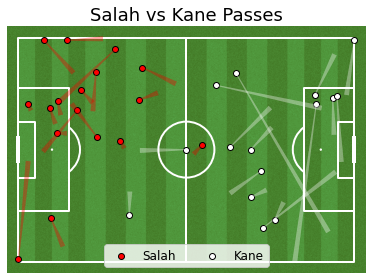

In [84]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

salah1 = pitch.scatter(salah.location_x, salah.location_y, ax=ax, color="red", edgecolors="k", label="Salah")
salah2 = pitch.lines(salah.location_x, salah.location_y, salah.end_x, salah.end_y, ax=ax, alpha=0.2, color="red", comet=True)

kane1 = pitch.scatter(kane.location_x, kane.location_y, ax=ax, color="white", edgecolors="k", label="Kane")
kane2 = pitch.lines(kane.location_x, kane.location_y, kane.end_x, kane.end_y, ax=ax, alpha=0.2, color="white", comet=True)

legend = ax.legend(loc='lower center', labelspacing=1, fontsize=12, ncol=4)
title = ax.set_title('Salah vs Kane Passes', fontsize = 18)